------------------------------------------------------

**Final Project**

Endi, Owen, Carlos

------------------------------------------------------

# STEP 0) DEPENDENCIES AND ENVIRONMENT SETUP


In [1]:
!ls /usr/lib/jvm
!java -version
!wget http://apache.osuosl.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install yfinance

default-java  java-1.11.0-openjdk-amd64  java-11-openjdk-amd64
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
--2021-07-28 10:40:07--  http://apache.osuosl.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving apache.osuosl.org (apache.osuosl.org)... 64.50.233.100, 140.211.166.134, 64.50.236.52, ...
Connecting to apache.osuosl.org (apache.osuosl.org)|64.50.233.100|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228834641 (218M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop3.2.tgz’

spark-3.1.2-bin-had 100%[===================>] 218.23M  30.6MB/s    in 40s     

2021-07-28 10:40:47 (5.41 MB/s) - ‘spark-3.1.2-bin-hadoop3.2.tgz’ saved [228834641/228834641]

     |████████████████████████████████| 6.3 MB 9.4 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-1.11.0-openjdk-amd64"
os.environ["PATH"] = os.environ["PATH"] + "$JAVA_HOME/bin:$PATH"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"
!source ~/.bashrc
print (os.environ["JAVA_HOME"])

/usr/lib/jvm/java-1.11.0-openjdk-amd64


In [3]:
#Provides findspark.init() to make pyspark importable as a regular library.
import findspark
findspark.init()
import pyspark.sql.functions as F

try:
    sc.stop()
except:
    pass
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
conf = SparkConf().setAppName("StockAnalyzer").setMaster("local[*]")#local[2]
sc=SparkContext(conf = conf)
spark = SparkSession(sparkContext=sc)

------------------------------------------------------

# STEP 1) IMPORT AND FORMAT REDDIT SUBMISSION DATA

In [4]:
# Read the raw data csv file into a dataframe.
submissions_raw = spark.read.options(header=True,delimiter=",",escape="\"").csv("reddit_submissions.csv")

In [5]:
# Here we are showing some data to ensure we have the correct format.
submissions_raw.show(10,truncate=True)

+-----------+------+--------------------+--------------------+--------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+
|created_utc|    id|               title|            selftext|stickied| _c5| _c6| _c7| _c8| _c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|_c41|_c42|_c43|_c44|_c45|_c46|_c47|_c48|_c49|_c50|_c51|_c52|_c53|_c54|_c55|_c56|_c57|_c58|_c59|_c60|_c61|_c62|_c63|_c64|_c65|_c66|_c67|_c68|_c69|_c70|_c71

# Step 2 get stock counts 

In [6]:
subs = submissions_raw.withColumn('created_utc', F.from_unixtime(submissions_raw.created_utc,"yyyy-MM-dd").cast('timestamp'))

subs.show(2)

+-------------------+------+--------------------+---------+--------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+
|        created_utc|    id|               title| selftext|stickied| _c5| _c6| _c7| _c8| _c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|_c41|_c42|_c43|_c44|_c45|_c46|_c47|_c48|_c49|_c50|_c51|_c52|_c53|_c54|_c55|_c56|_c57|_c58|_c59|_c60|_c61|_c62|_c63|_c64|_c65|_c66|_c67|_c68|_c69|_c70|_c71|_c72|

In [7]:
stocks = ["TSLA","GME","AMC","SNDL"] #feel free to add more stocks.

def extract_ticker(text):
    for stock in stocks:
        if stock in text:
            return stock
    
    return text

extract_ticker_udf = F.udf(extract_ticker,F.StringType())

In [8]:
daily_stock_counts = subs.selectExpr("created_utc","title","selftext")\
    .withColumn('word_counts',\
                F.explode(
                    F.split(
                        F.concat( F.col('title'), F.lit(' '), F.col('selftext'))
                    ,' ')
                )).where(
                    F.col('word_counts').rlike("|".join(["(" + stock + ")" for stock in stocks]))  #https://stackoverflow.com/questions/58186366/filter-pyspark-dataframe-if-contains-a-list-of-strings
                )\
    .withColumn('word_counts',extract_ticker_udf(F.col('word_counts')))\
    .drop('title','selftext')\
    .groupBy('created_utc','word_counts')\
    .count()\
    .orderBy(F.desc('created_utc'),F.desc('count'))
    
daily_stock_counts.show()
    

+-------------------+-----------+-----+
|        created_utc|word_counts|count|
+-------------------+-----------+-----+
|2021-07-04 00:00:00|        AMC|   28|
|2021-07-04 00:00:00|        GME|   18|
|2021-07-04 00:00:00|       SNDL|    4|
|2021-07-04 00:00:00|       TSLA|    2|
|2021-07-03 00:00:00|        AMC|   39|
|2021-07-03 00:00:00|        GME|   15|
|2021-07-03 00:00:00|       TSLA|    2|
|2021-07-02 00:00:00|        AMC|  136|
|2021-07-02 00:00:00|        GME|   53|
|2021-07-02 00:00:00|       SNDL|   12|
|2021-07-02 00:00:00|       TSLA|    8|
|2021-07-01 00:00:00|        AMC|  106|
|2021-07-01 00:00:00|        GME|   63|
|2021-07-01 00:00:00|       SNDL|    3|
|2021-07-01 00:00:00|       TSLA|    2|
|2021-06-30 00:00:00|        AMC|   89|
|2021-06-30 00:00:00|        GME|   60|
|2021-06-30 00:00:00|       SNDL|    5|
|2021-06-30 00:00:00|       TSLA|    5|
|2021-06-29 00:00:00|        AMC|   94|
+-------------------+-----------+-----+
only showing top 20 rows



# Get weekly rolling averages for each stock

In [9]:
from pyspark.sql.window import Window
from pyspark.sql.functions import days

w = (Window()
    .partitionBy(F.col("word_counts"))
    .orderBy(F.col("created_utc").cast('long'))
    .rangeBetween(-7*24*60*60, 0))

df = daily_stock_counts.withColumn('rolling_average', F.avg("count").over(w))

df.show()

+-------------------+-----------+-----+------------------+
|        created_utc|word_counts|count|   rolling_average|
+-------------------+-----------+-----+------------------+
|2021-01-11 00:00:00|       TSLA|   73|              73.0|
|2021-01-12 00:00:00|       TSLA|   52|              62.5|
|2021-01-13 00:00:00|       TSLA|   55|              60.0|
|2021-01-14 00:00:00|       TSLA|   44|              56.0|
|2021-01-15 00:00:00|       TSLA|   29|              50.6|
|2021-01-16 00:00:00|       TSLA|   26|              46.5|
|2021-01-17 00:00:00|       TSLA|   15|              42.0|
|2021-01-18 00:00:00|       TSLA|   17|            38.875|
|2021-01-19 00:00:00|       TSLA|   33|            33.875|
|2021-01-20 00:00:00|       TSLA|   21|              30.0|
|2021-01-21 00:00:00|       TSLA|   31|              27.0|
|2021-01-22 00:00:00|       TSLA|   26|             24.75|
|2021-01-23 00:00:00|       TSLA|   41|             26.25|
|2021-01-24 00:00:00|       TSLA|    5|            23.62

In [ ]:
#df.write.csv("stock_counts_daily.csv")

# Plot rolling averages for each stock compared to rolling 7 day averages of closing stock price 

In [10]:
df_pd = df.toPandas()

print(df_pd.head())

  created_utc word_counts  count  rolling_average
0  2021-01-11        TSLA     73             73.0
1  2021-01-12        TSLA     52             62.5
2  2021-01-13        TSLA     55             60.0
3  2021-01-14        TSLA     44             56.0
4  2021-01-15        TSLA     29             50.6


In [11]:
tsla_counts = df_pd[df_pd["word_counts"] =="TSLA"]

In [36]:
tsla_counts

,created_utc,word_counts,count,rolling_average
0,2021-01-11,TSLA,63,63.000000
1,2021-01-12,TSLA,32,47.500000
2,2021-01-13,TSLA,30,41.666667
3,2021-01-14,TSLA,10,33.750000
4,2021-01-15,TSLA,12,29.400000
...,...,...,...,...
101,2021-06-28,TSLA,4,2.142857
102,2021-06-30,TSLA,4,2.571429
103,2021-07-02,TSLA,4,3.000000
104,2021-07-03,TSLA,2,3.000000


In [11]:
!pip install pandas-datareader

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override() 

start = datetime.datetime(2020, 12, 1)
end = datetime.datetime(2021, 7, 11)

tesla_stock = web.DataReader("TSLA", start, end)
tesla_stock.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,597.590027,597.849976,572.049988,584.760010,584.760010,40103500
2020-12-02,556.440002,571.539978,541.210022,568.820007,568.820007,47775700
2020-12-03,590.020020,598.969971,582.429993,593.380005,593.380005,42552000
2020-12-04,591.010010,599.039978,585.500000,599.039978,599.039978,29401300
2020-12-07,604.919983,648.789978,603.049988,641.760010,641.760010,56309700


In [26]:
close_px = tesla_stock['Adj Close']
mavg = close_px.rolling(window=7).mean()
close_px.iloc[:]

Date
2020-12-01    584.760010
2020-12-02    568.820007
2020-12-03    593.380005
2020-12-04    599.039978
2020-12-07    641.760010
                 ...    
2021-07-02    678.900024
2021-07-06    659.580017
2021-07-07    644.650024
2021-07-08    652.809998
2021-07-09    656.950012
Name: Adj Close, Length: 152, dtype: float64

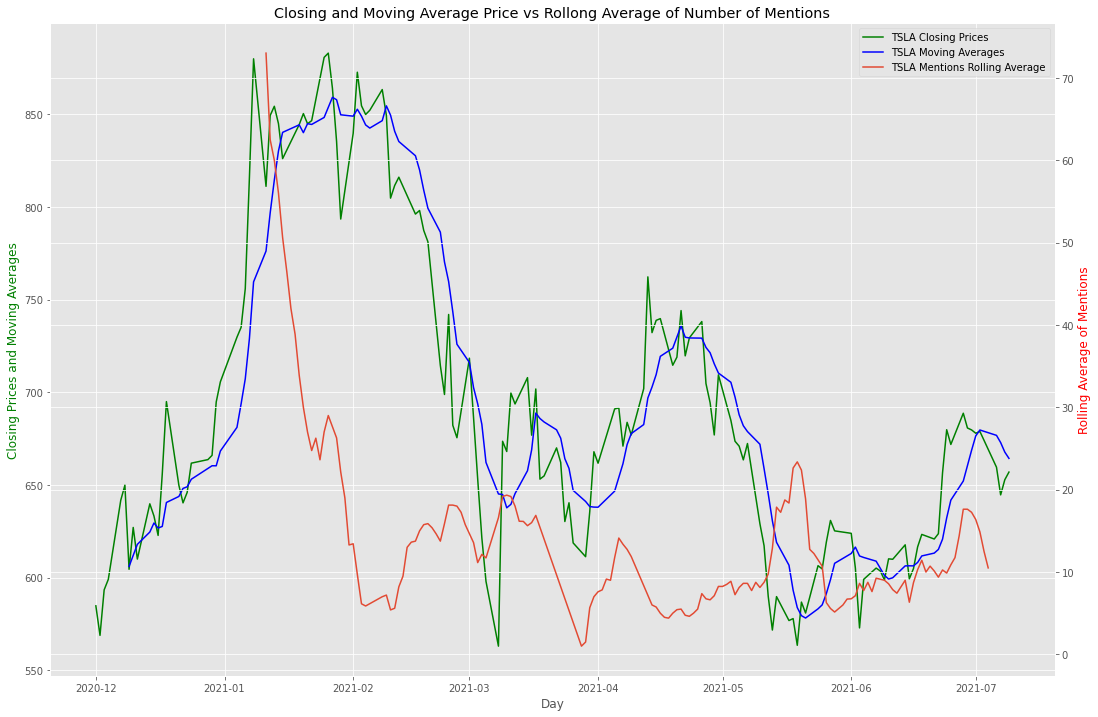

In [64]:
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(18, 12))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
lns1= ax1.plot(close_px, 'g-',label="TSLA Closing Prices")
lns2= ax1.plot(mavg, 'b-',label="TSLA Moving Averages")
lns3= ax2.plot(tsla_counts['created_utc'],tsla_counts['rolling_average'],label="TSLA Mentions Rolling Average")
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
# ax1.legend(loc=0)
# ax2.legend(loc="upper left")


ax1.set_xlabel('Day')
ax1.set_ylabel('Closing Prices and Moving Averages', color='g')
ax2.set_ylabel('Rolling Average of Mentions', color='r')
ax1.title.set_text('Closing and Moving Average Price vs Rollong Average of Number of Mentions')

plt.show()

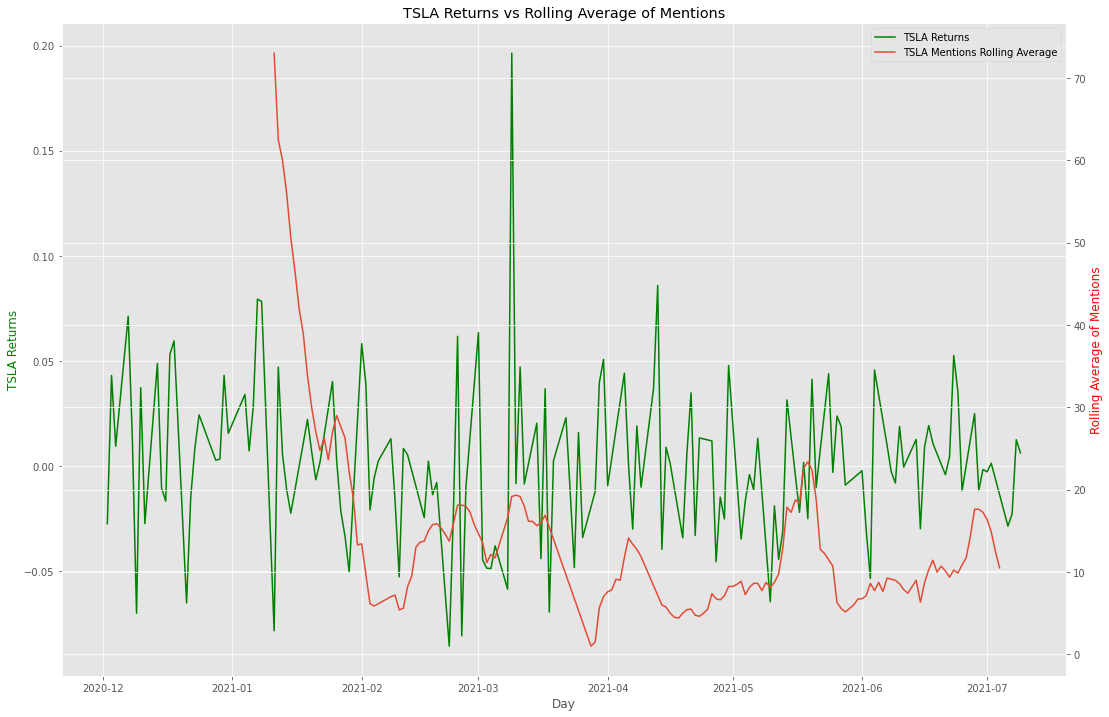

In [70]:
rets = close_px / close_px.shift(1) - 1
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

lns1 = ax1.plot(rets,'g-',label="TSLA Returns")
lns2 = ax2.plot(tsla_counts['created_utc'],tsla_counts['rolling_average'],label="TSLA Mentions Rolling Average")
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

ax1.set_xlabel('Day')
ax1.set_ylabel('TSLA Returns', color='g')
ax2.set_ylabel('Rolling Average of Mentions', color='r')
ax1.title.set_text('TSLA Returns vs Rolling Average of Mentions')

plt.show()